In [38]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
import seaborn as sns
from config import consumer_key, consumer_secret, access_token, access_token_secret

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [2]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [3]:
# Target Account
target_user_1 = "@BBCNews"

# Counter
counter = 1

# Variables for holding sentiments
bbc_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user_1)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print out snippets of tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        bbc_sentiments.append({"Date": tweet["created_at"], 
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

Tweet 1: Two men dead after Edgware 'carbon monoxide leak' https://t.co/RLLdCv2WM7
Tweet 2: RT @BBCSport: Day 4 - Commonwealth Games #GC2018 

Rhys McClenaghan secured Northern Ireland's first medal of the 2018 Commonwealth Games 🏅…
Tweet 3: Hackney stabbing: Second stab death suspect 'at large', police say https://t.co/UBc0z1ANNG
Tweet 4: RT @BBC_HaveYourSay: Are you coming to Windsor to watch the #RoyalWedding in May? Where are you travelling from? Would you consider yoursel…
Tweet 5: Sunday Times' Rod Liddell 'mocks Wales' over Severn crossing renaming https://t.co/2hok9ikQQi
Tweet 6: Fishermen protest over lack of control of UK waters post-Brexit https://t.co/jQRhEijGcD
Tweet 7: UK wife-carrying contest takes place in Dorking https://t.co/wGxmIhLeg3
Tweet 8: RT @BBCSport: Day 4 - Commonwealth Games #GC2018 

Rhys McClenaghan secured Northern Ireland's first medal of the 2018 Commonwealth Games 🏅…
Tweet 9: Tony Blair believes NI deal 'still possible' but warns over Brexit https://t.

Tweet 81: Two men dead after Edgware 'carbon monoxide leak' https://t.co/RLLdCv2WM7
Tweet 82: RT @BBCSport: Day 4 - Commonwealth Games #GC2018 

Rhys McClenaghan secured Northern Ireland's first medal of the 2018 Commonwealth Games 🏅…
Tweet 83: Hackney stabbing: Second stab death suspect 'at large', police say https://t.co/UBc0z1ANNG
Tweet 84: RT @BBC_HaveYourSay: Are you coming to Windsor to watch the #RoyalWedding in May? Where are you travelling from? Would you consider yoursel…
Tweet 85: Sunday Times' Rod Liddell 'mocks Wales' over Severn crossing renaming https://t.co/2hok9ikQQi
Tweet 86: Fishermen protest over lack of control of UK waters post-Brexit https://t.co/jQRhEijGcD
Tweet 87: UK wife-carrying contest takes place in Dorking https://t.co/wGxmIhLeg3
Tweet 88: RT @BBCSport: Day 4 - Commonwealth Games #GC2018 

Rhys McClenaghan secured Northern Ireland's first medal of the 2018 Commonwealth Games 🏅…
Tweet 89: Tony Blair believes NI deal 'still possible' but warns over Brexit h

In [4]:
# Create a dataframe for the sentiments
bbc_sentiments_pd = pd.DataFrame.from_dict(bbc_sentiments)
bbc_sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.7717,Sun Apr 08 18:48:06 +0000 2018,0.511,0.489,0.000,1
1,0.7003,Sun Apr 08 18:20:16 +0000 2018,0.746,0.000,0.254,2
2,-0.8720,Sun Apr 08 18:11:22 +0000 2018,0.447,0.553,0.000,3
3,0.0000,Sun Apr 08 15:51:58 +0000 2018,1.000,0.000,0.000,4
4,-0.4588,Sun Apr 08 15:46:10 +0000 2018,0.769,0.231,0.000,5


In [5]:
# Target Account
target_user_2 = "@CBSNews"

# Counter
counter = 1

# Variables for holding sentiments
cbs_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user_2)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print out snippets of tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        cbs_sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

Tweet 1: At an illustrious university, famous for taking itself seriously, one student magazine’s staff devotes itself to pu… https://t.co/R1Ksf6Xwnr
Tweet 2: Trump Tower fire victim was avid art collector who spent time with Andy Warhol, but fell on hard financial times in… https://t.co/nESndzACzm
Tweet 3: WATCH: A golfer fed up with winter weather in the spring decides to tee off in the snow. Guess that's why they don'… https://t.co/1pH2AtGPM2
Tweet 4: Tonight, @Oprah Winfrey reports on a new monument going up in Montgomery, Ala. that documents the lynchings of Afri… https://t.co/0j7LM0pTkK
Tweet 5: WATCH: 400 decorative boats set sail for the 2018 Qintong Boat Festival, with more than 10,000 participants in colo… https://t.co/pMFWzzN1Im
Tweet 6: Bernie Taupin, Elton John's musical collaborator for over 50 years, is a man of lyrics, and now art… https://t.co/kS4DpxFOSg
Tweet 7: Jimmy Kimmel apologizes for gay joke amid feud with Sean Hannity https://t.co/NSqvyaDcjD https://t.co/8VDKu

Tweet 61: At an illustrious university, famous for taking itself seriously, one student magazine’s staff devotes itself to pu… https://t.co/R1Ksf6Xwnr
Tweet 62: Trump Tower fire victim was avid art collector who spent time with Andy Warhol, but fell on hard financial times in… https://t.co/nESndzACzm
Tweet 63: WATCH: A golfer fed up with winter weather in the spring decides to tee off in the snow. Guess that's why they don'… https://t.co/1pH2AtGPM2
Tweet 64: Tonight, @Oprah Winfrey reports on a new monument going up in Montgomery, Ala. that documents the lynchings of Afri… https://t.co/0j7LM0pTkK
Tweet 65: WATCH: 400 decorative boats set sail for the 2018 Qintong Boat Festival, with more than 10,000 participants in colo… https://t.co/pMFWzzN1Im
Tweet 66: Bernie Taupin, Elton John's musical collaborator for over 50 years, is a man of lyrics, and now art… https://t.co/kS4DpxFOSg
Tweet 67: Jimmy Kimmel apologizes for gay joke amid feud with Sean Hannity https://t.co/NSqvyaDcjD https://t.c

In [6]:
# Create a dataframe for the sentiments
cbs_sentiments_pd = pd.DataFrame.from_dict(cbs_sentiments)
cbs_sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.2263,Sun Apr 08 21:45:29 +0000 2018,0.788,0.084,0.128,1
1,-0.3071,Sun Apr 08 21:31:01 +0000 2018,0.736,0.198,0.065,2
2,0.0000,Sun Apr 08 21:25:37 +0000 2018,1.000,0.000,0.000,3
3,0.0000,Sun Apr 08 21:05:57 +0000 2018,1.000,0.000,0.000,4
4,0.4939,Sun Apr 08 20:45:36 +0000 2018,0.856,0.000,0.144,5


In [7]:
# Target Account
target_user_3 = "@CNN"

# Counter
counter = 1

# Variables for holding sentiments
cnn_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user_3)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print out snippets of tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        cnn_sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

Tweet 1: Body found in ocean near site of Hart family crash https://t.co/iMioXi2ikE https://t.co/0IBrFFI01v
Tweet 2: "Scott is doing a great job!" President Trump defends embattled Environmental Protection Agency administrator Scott… https://t.co/AvNWuWPcmu
Tweet 3: White House chief of staff John Kelly's influence in the White House is diminishing, The Washington Post reports… https://t.co/0mV0jbbeUT
Tweet 4: Musician and National Rifle Association board member Ted Nugent likens Democrats, media, academics to "rabid coyote… https://t.co/Bjd7RA2vOj
Tweet 5: Lightning strike kills 1, injures 4 in Florida https://t.co/EWeVc4RN27 https://t.co/oN64XlUtqB
Tweet 6: Pilots had safety concerns months before NYC helicopter crash, lawyer says https://t.co/cdjCClnp82 https://t.co/3zyIYoHmMo
Tweet 7: Polls open as Hungary's Euroskeptic leader Orban seeks fourth term https://t.co/4CL9j8UXkF https://t.co/M08G460BIC
Tweet 8: "Saturday Night Live" returns to take shots at President Trump and Fox News 

Tweet 81: Body found in ocean near site of Hart family crash https://t.co/iMioXi2ikE https://t.co/0IBrFFI01v
Tweet 82: "Scott is doing a great job!" President Trump defends embattled Environmental Protection Agency administrator Scott… https://t.co/AvNWuWPcmu
Tweet 83: White House chief of staff John Kelly's influence in the White House is diminishing, The Washington Post reports… https://t.co/0mV0jbbeUT
Tweet 84: Musician and National Rifle Association board member Ted Nugent likens Democrats, media, academics to "rabid coyote… https://t.co/Bjd7RA2vOj
Tweet 85: Lightning strike kills 1, injures 4 in Florida https://t.co/EWeVc4RN27 https://t.co/oN64XlUtqB
Tweet 86: Pilots had safety concerns months before NYC helicopter crash, lawyer says https://t.co/cdjCClnp82 https://t.co/3zyIYoHmMo
Tweet 87: Polls open as Hungary's Euroskeptic leader Orban seeks fourth term https://t.co/4CL9j8UXkF https://t.co/M08G460BIC
Tweet 88: "Saturday Night Live" returns to take shots at President Trump and F

In [8]:
# Create a dataframe for the sentiments
cnn_sentiments_pd = pd.DataFrame.from_dict(cnn_sentiments)
cnn_sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.4019,Sun Apr 08 21:45:04 +0000 2018,0.803,0.197,0.000,1
1,0.6588,Sun Apr 08 21:30:04 +0000 2018,0.761,0.000,0.239,2
2,0.0000,Sun Apr 08 21:15:07 +0000 2018,1.000,0.000,0.000,3
3,0.0000,Sun Apr 08 21:00:07 +0000 2018,1.000,0.000,0.000,4
4,-0.6124,Sun Apr 08 20:45:06 +0000 2018,0.583,0.417,0.000,5


In [9]:
# Target Account
target_user_4 = "@FoxNews"

# Counter
counter = 1

# Variables for holding sentiments
fox_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user_4)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print out snippets of tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        fox_sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

Tweet 1: RT @FoxBusiness: .@Facebook to send Cambridge Analytica data-use notices on Monday https://t.co/EJLtiXUt2G
Tweet 2: Brandon Judd: "I have to applaud President @realDonaldTrump for putting the @USNationalGuard on the border because… https://t.co/4uRviSLXh5
Tweet 3: DEVELOPING: North Korea has told the @realDonaldTrump administration that Kim Jong Un is ready to discuss denuclear… https://t.co/mMmIqNvaud
Tweet 4: Blooming red tulips are seen in the gardens of the South Lawn of the @WhiteHouse. https://t.co/5tbQb72pjG
Tweet 5: RT @EricShawnTV: Chemical weapons were banned by the 1925 Geneva Protocol after their horrific use in World War One. It is an attack on wor…
Tweet 6: Rain or shine, soldiers keep watch over the Tomb of the Unknown Soldier to honor the service members who made the u… https://t.co/rB1qmAgE4X
Tweet 7: Kim Jong Un willing to discuss getting rid of North Korea's nukes, US says https://t.co/Gh5W2f8Ea7
Tweet 8: RT @foxnewspolitics: Kennedy dynasty faces a reckonin

Tweet 61: RT @FoxBusiness: .@Facebook to send Cambridge Analytica data-use notices on Monday https://t.co/EJLtiXUt2G
Tweet 62: Brandon Judd: "I have to applaud President @realDonaldTrump for putting the @USNationalGuard on the border because… https://t.co/4uRviSLXh5
Tweet 63: DEVELOPING: North Korea has told the @realDonaldTrump administration that Kim Jong Un is ready to discuss denuclear… https://t.co/mMmIqNvaud
Tweet 64: Blooming red tulips are seen in the gardens of the South Lawn of the @WhiteHouse. https://t.co/5tbQb72pjG
Tweet 65: RT @EricShawnTV: Chemical weapons were banned by the 1925 Geneva Protocol after their horrific use in World War One. It is an attack on wor…
Tweet 66: Rain or shine, soldiers keep watch over the Tomb of the Unknown Soldier to honor the service members who made the u… https://t.co/rB1qmAgE4X
Tweet 67: Kim Jong Un willing to discuss getting rid of North Korea's nukes, US says https://t.co/Gh5W2f8Ea7
Tweet 68: RT @foxnewspolitics: Kennedy dynasty faces a 

In [10]:
# Create a dataframe for the sentiments
fox_sentiments_pd = pd.DataFrame.from_dict(fox_sentiments)
fox_sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,0.0000,Sun Apr 08 21:44:06 +0000 2018,1.000,0.000,0.000,1
1,0.4588,Sun Apr 08 21:42:00 +0000 2018,0.842,0.000,0.158,2
2,0.3612,Sun Apr 08 21:31:03 +0000 2018,0.872,0.000,0.128,3
3,0.0000,Sun Apr 08 21:30:00 +0000 2018,1.000,0.000,0.000,4
4,-0.9538,Sun Apr 08 21:27:28 +0000 2018,0.536,0.464,0.000,5


In [11]:
# Target Account
target_user_5 = "@nytimes"

# Counter
counter = 1

# Variables for holding sentiments
ny_sentiments = []

# Loop through 5 pages of tweets (total 100 tweets)
for x in range(5):

    # Get all tweets from home feed
    public_tweets = api.user_timeline(target_user_5)

    # Loop through all tweets 
    for tweet in public_tweets:

        # Print out snippets of tweets
        print("Tweet %s: %s" % (counter, tweet["text"]))
        
        # Run Vader Analysis on each tweet
        compound = analyzer.polarity_scores(tweet["text"])["compound"]
        pos = analyzer.polarity_scores(tweet["text"])["pos"]
        neu = analyzer.polarity_scores(tweet["text"])["neu"]
        neg = analyzer.polarity_scores(tweet["text"])["neg"]
        tweets_ago = counter
        
        # Add sentiments for each tweet into an array
        ny_sentiments.append({"Date": tweet["created_at"], 
                               "Compound": compound,
                               "Positive": pos,
                               "Negative": neu,
                               "Neutral": neg,
                               "Tweets Ago": counter})
        
        # Add to counter 
        counter = counter + 1

Tweet 1: "President Xi and I will always be friends, no matter what happens with our dispute on trade,” President Trump twee… https://t.co/dAvlL6seAK
Tweet 2: The Denver Post is in open revolt against its owner https://t.co/Lw62YzaCPk
Tweet 3: Common Sense: With Tesla in a Danger Zone, Can Model 3 Carry It to Safety? https://t.co/KjYFEtsMgv
Tweet 4: RT @brooksbarnesNYT: ‘A Quiet Place’ Is a Huge No. 1 at the Box Office, Boosting Paramount ... At $50M twice what was expected and, out of…
Tweet 5: Amid Fears of Trade War, Trump Predicts China Will Relent https://t.co/uWmmVeLe4h
Tweet 6: Gov. Rick Scott of Florida is expected to announce on Monday that he's running for the U.S. Senate against Bill Nel… https://t.co/yFympY459r
Tweet 7: For many women in the 5 boroughs of New York, training is a gateway into the world of competitive fighting https://t.co/6VsTR5Gp1I
Tweet 8: RT @nytimesarts: A trove of paintings, mementoes from the film "Gladiator," prop horses, guitars, diamond rings and co

Tweet 61: "President Xi and I will always be friends, no matter what happens with our dispute on trade,” President Trump twee… https://t.co/dAvlL6seAK
Tweet 62: The Denver Post is in open revolt against its owner https://t.co/Lw62YzaCPk
Tweet 63: Common Sense: With Tesla in a Danger Zone, Can Model 3 Carry It to Safety? https://t.co/KjYFEtsMgv
Tweet 64: RT @brooksbarnesNYT: ‘A Quiet Place’ Is a Huge No. 1 at the Box Office, Boosting Paramount ... At $50M twice what was expected and, out of…
Tweet 65: Amid Fears of Trade War, Trump Predicts China Will Relent https://t.co/uWmmVeLe4h
Tweet 66: Gov. Rick Scott of Florida is expected to announce on Monday that he's running for the U.S. Senate against Bill Nel… https://t.co/yFympY459r
Tweet 67: For many women in the 5 boroughs of New York, training is a gateway into the world of competitive fighting https://t.co/6VsTR5Gp1I
Tweet 68: RT @nytimesarts: A trove of paintings, mementoes from the film "Gladiator," prop horses, guitars, diamond ring

In [12]:
# Create a dataframe for the sentiments
ny_sentiments_pd = pd.DataFrame.from_dict(ny_sentiments)
ny_sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Tweets Ago
0,-0.1779,Sun Apr 08 21:42:00 +0000 2018,0.637,0.195,0.167,1
1,0.0000,Sun Apr 08 21:27:06 +0000 2018,1.000,0.000,0.000,2
2,-0.1531,Sun Apr 08 21:19:46 +0000 2018,0.659,0.187,0.154,3
3,0.3612,Sun Apr 08 21:12:07 +0000 2018,0.753,0.079,0.168,4
4,-0.7717,Sun Apr 08 21:11:54 +0000 2018,0.573,0.427,0.000,5


In [13]:
# Export dataframes to into a CSV file
bbc_sentiments_pd.to_csv('clean_bbc.csv', index=False)
cbs_sentiments_pd.to_csv('clean_cbs.csv', index=False)
cnn_sentiments_pd.to_csv('clean_cnn.csv', index=False)
fox_sentiments_pd.to_csv('clean_fox.csv', index=False)
ny_sentiments_pd.to_csv('clean_ny.csv', index=False)

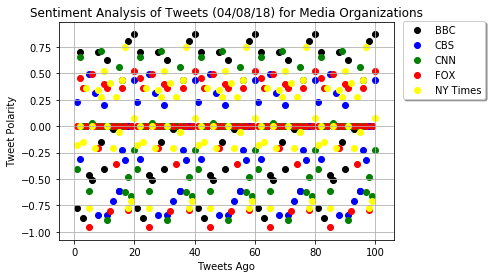

In [82]:
# Create scatterplot
plt.scatter(bbc_sentiments_pd['Tweets Ago'], bbc_sentiments_pd['Compound'], color='black', label='BBC')
plt.scatter(cbs_sentiments_pd['Tweets Ago'], cbs_sentiments_pd['Compound'], color='blue', label='CBS')
plt.scatter(cnn_sentiments_pd['Tweets Ago'], cnn_sentiments_pd['Compound'], color='green', label='CNN')
plt.scatter(fox_sentiments_pd['Tweets Ago'], fox_sentiments_pd['Compound'], color='red', label='FOX')
plt.scatter(ny_sentiments_pd['Tweets Ago'], ny_sentiments_pd['Compound'], color='yellow', label='NY Times')

# Incorporate the other graph properties
plt.title("Sentiment Analysis of Tweets (%s) for %s" % (time.strftime("%x"), "Media Organizations"))
plt.xlabel("Tweets Ago")
plt.ylabel("Tweet Polarity")
plt.legend(loc='upper center', bbox_to_anchor=(1.15, 1.03), shadow=True, ncol=1)
plt.grid(True)
plt.show()

# Save scatter plot
fig = plt.figure()
fig.savefig('Media_Tweets.png', bbox_inches='tight')

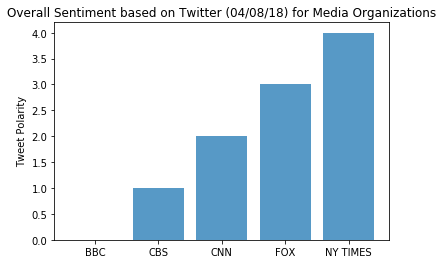

In [93]:
# Create box plot
#sentiments = (bbc_sentiments_pd['Compound'].agg([np.mean]), cbs_sentiments_pd['Compound'].agg([np.mean]), cnn_sentiments_pd['Compound'].agg([np.mean])
#             ,fox_sentiments_pd['Compound'].agg([np.mean]), ny_sentiments_pd['Compound'].agg([np.mean]))
    
sentiments = ('BBC', 'CBS', 'CNN', 'FOX', 'NY TIMES')
x_pos = np.arange(len(sentiments))
y_pos = np.arange(len(sentiments))

# Incorporate the other graph properties
plt.bar(x_pos, y_pos, align='center', alpha=0.75)
plt.title("Overall Sentiment based on Twitter (%s) for %s" % (time.strftime("%x"), "Media Organizations"))
plt.xticks(y_pos, sentiments)
plt.ylabel("Tweet Polarity")
plt.show()

# Save bar plot
fig = plt.figure()
fig.savefig('Overall_Sentiments.png')